<a href="https://colab.research.google.com/github/aparnasree2020/CAS_RPM_2023_GBM/blob/main/XGBoost_Models_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost
import xgboost
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


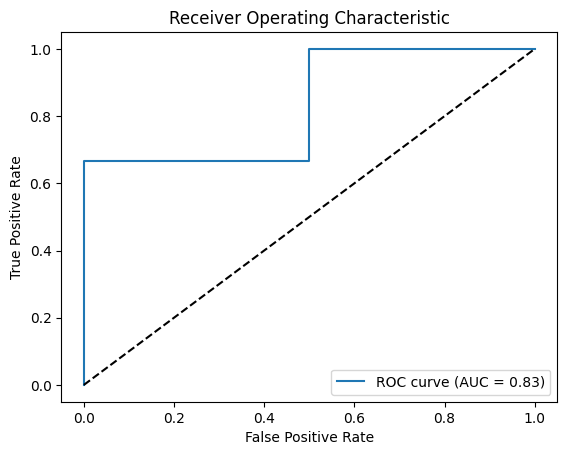

AUC: 0.8333333333333333
Installation of libraries took: 0.0 minutes


In [ ]:
import time
import importlib

start_time = time.time()

# Check if the xgboost package is already installed, install it if not
try:
    xgboost = importlib.import_module('xgboost')
except ImportError:
    !pip install xgboost
    xgboost = importlib.import_module('xgboost')

# Check if the scikit-learn package is already installed, install it if not
try:
    sklearn = importlib.import_module('sklearn')
except ImportError:
    !pip install scikit-learn
    sklearn = importlib.import_module('sklearn')

# Import the required functions from scikit-learn
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have true labels and predicted probabilities
y_true = [0, 0, 1, 1, 1]
y_scores = [0.1, 0.3, 0.2, 0.8, 0.9]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute AUC
auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print AUC
print('AUC:', auc)

end_time = time.time()
elapsed_time = end_time - start_time
print("Installation of libraries took:", round(elapsed_time / 60, 2), "minutes")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def avse_plot_classification(data, var, actual, pred, weight, rt_text, lt_text):
    header = "Actual vs Predicted"

    # Calculate actual and predicted values based on the input data
    home_plot = data.groupby(var).agg({'actual': 'sum', 'pred': 'sum', 'exposures': 'sum'}).reset_index()
    home_plot['actual'] = home_plot['actual'] / home_plot['exposures']
    home_plot['predicted'] = home_plot['pred'] / home_plot['exposures']

    # Remove rows with missing values
    home_plot = home_plot.dropna()

    # Calculate the off-balance adjustment factor
    off_balance = sum(data[actual]) / sum(data[pred])
    home_plot['predicted'] = home_plot['predicted'] * off_balance

    # Set up the plot
    plt.figure(figsize=(8, 6))

    # Create a bar plot for exposures
    plt.bar(home_plot[var], home_plot['exposures'], color='lightblue')
    plt.ylim(0, max(home_plot['exposures']) * 1.1)

    # Overlay a line plot for actual vs. predicted values
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(home_plot[var], home_plot['actual'], color='darkblue', linewidth=4)
    ax2.plot(home_plot[var], home_plot['predicted'], color='green', linewidth=3)
    ax2.set_ylim([min(home_plot['actual'])*0.98, max(home_plot['actual'])*1.02])
    ax2.set_ylabel('Actual / Predicted', color='black')
    ax2.tick_params(axis='y', colors='black')

    # Set labels and title
    ax.set_xlabel(var, color='black')
    ax.set_ylabel('Exposures', color='black')
    ax.set_title(header)

    # Set axis tick color
    ax.tick_params(colors='black')
    ax2.tick_params(colors='black')

    # Add right text and left text
    ax2.text(1.02, 0.5, rt_text, transform=ax2.transAxes, verticalalignment='center', color='black', fontsize=7)
    ax2.text(-0.12, 0.5, lt_text, transform=ax2.transAxes, verticalalignment='center', color='black', fontsize=7)

    plt.show()


In [ ]:
import pandas as pd
import urllib.request
import zipfile
import os

url = "https://raw.github.com/aparnasree2020/sampledata_casws/master/gbm_data_rpm_2023_1M_v3.zip"
temp_zip = "gbm_data_rpm_2023_1M_v3.zip"
temp_csv = "gbm_data_rpm_2023_1M_v3.csv"

# Download the ZIP file
urllib.request.urlretrieve(url, temp_zip)

# Extract the CSV file from the ZIP
with zipfile.ZipFile(temp_zip, 'r') as zip_ref:
    zip_ref.extract(temp_csv)

# Load the data into a DataFrame
gbm_data = pd.read_csv(temp_csv)

# Clean up the temporary files
os.remove(temp_zip)
os.remove(temp_csv)

# Assign the loaded data to the full_data variable
full_data = gbm_data
print(full_data)

          py  late_payments  credit  veh_count  driver_count  \
0       2018              0       7          4             3   
1       2015              0       5          2             2   
2       2016              2       5          2             1   
3       2015              0       3          3             4   
4       2015              0       2          2             2   
...      ...            ...     ...        ...           ...   
999995  2016              0       5          2             2   
999996  2015              0      10          3             3   
999997  2015              0       5          2             2   
999998  2016              0       9          2             3   
999999  2017              0       5          3             3   

        veh_driver_ratio  veh_age  limit_pd  driver_age  acc_minor  ...  \
0               1.333008       13     25000          23          0  ...   
1               1.000000        4    100000          52          0  ...   
2     

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(31311)

# Splitting into trim and holdout data
trim = np.random.choice([True, False], size=full_data.shape[0], replace=True, p=[0.4, 0.6])
trim_data = full_data[trim]
holdout_data = full_data[~trim]

# Splitting trim_data into train and test data
sample = np.random.choice([True, False], size=trim_data.shape[0], replace=True, p=[0.8, 0.2])
train_data = trim_data[sample]
test_data = trim_data[~sample]

# Separating features (x) and target (y) variables
x_train = train_data.drop(columns=["claim_count_pd"])
y_train = train_data["claim_count_pd"]

x_test = test_data.drop(columns=["claim_count_pd"])
y_test = test_data["claim_count_pd"]


In [ ]:
column_names = train_data.columns
print(column_names)

Index(['py', 'late_payments', 'credit', 'veh_count', 'driver_count',
       'veh_driver_ratio', 'veh_age', 'limit_pd', 'driver_age', 'acc_minor',
       'acc_major', 'vio_speed', 'vio_minor', 'vio_major', 'pol_tenure',
       'ee_pd', 'claim_count_pd', 'geo_pop_density_ntile',
       'geo_median_home_value_ntile', 'geo_unemployment_pct_ntile',
       'geo_vacant_pct_ntile', 'geo_crime_index_ntile', 'geo_bach_pct_ntile',
       'prior_claim_freq_bi', 'prior_claim_freq_pd', 'prior_claim_freq_med',
       'prior_claim_freq_pip', 'prior_claim_freq_um', 'prior_claim_freq_uim',
       'prior_claim_freq_coll', 'prior_claim_freq_comp',
       'prior_claim_freq_tot', 'AAM', 'NOO', 'LOO', 'est_current_odo'],
      dtype='object')


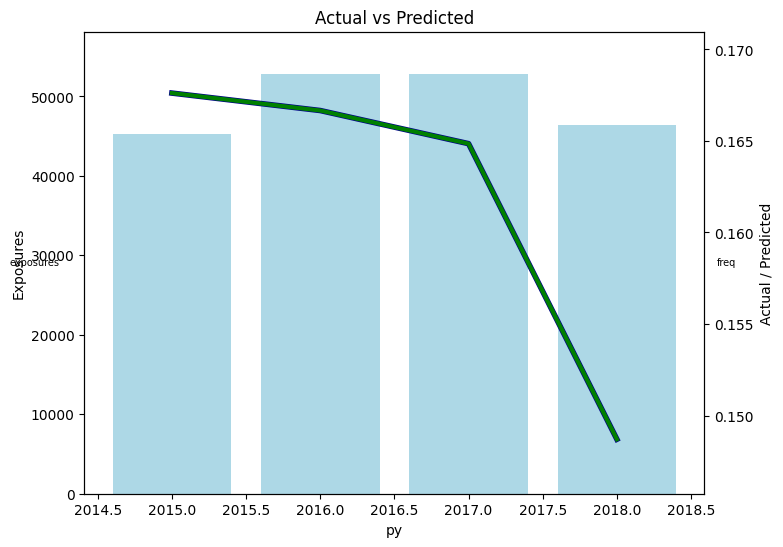

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def avse_plot_classification(data, var, actual, pred, weight, rt_text, lt_text):
    header = "Actual vs Predicted"

    # Calculate actual and predicted values based on the input data
    home_plot = data.groupby(var).agg({actual: 'sum', pred: 'sum', weight: 'sum'}).reset_index()
    home_plot['actual'] = home_plot[actual] / home_plot[weight]
    home_plot['predicted'] = home_plot[pred] / home_plot[weight]

    # Remove rows with missing values
    home_plot = home_plot.dropna()

    # Calculate the off-balance adjustment factor
    off_balance = sum(data[actual]) / sum(data[pred])
    home_plot['predicted'] = home_plot['predicted'] * off_balance

    # Set up the plot
    plt.figure(figsize=(8, 6))

    # Create a bar plot for exposures
    plt.bar(home_plot[var], home_plot[weight], color='lightblue')
    plt.ylim(0, max(home_plot[weight]) * 1.1)

    # Overlay a line plot for actual vs. predicted values
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(home_plot[var], home_plot['actual'], color='darkblue', linewidth=4)
    ax2.plot(home_plot[var], home_plot['predicted'], color='green', linewidth=3)
    ax2.set_ylim([min(home_plot['actual']) * 0.98, max(home_plot['actual']) * 1.02])
    ax2.set_ylabel('Actual / Predicted', color='black')
    ax2.tick_params(axis='y', colors='black')

    # Set labels and title
    ax.set_xlabel(var, color='black')
    ax.set_ylabel('Exposures', color='black')
    ax.set_title(header)

    # Set axis tick color
    ax.tick_params(colors='black')
    ax2.tick_params(colors='black')

    # Add right text and left text
    ax2.text(1.02, 0.5, rt_text, transform=ax2.transAxes, verticalalignment='center', color='black', fontsize=7)
    ax2.text(-0.12, 0.5, lt_text, transform=ax2.transAxes, verticalalignment='center', color='black', fontsize=7)

    plt.show()

# Call the avse_plot_classification function with the corrected arguments
avse_plot_classification(data=train_data, var="py", actual="claim_count_pd",
                         pred="claim_count_pd", weight="ee_pd",
                         lt_text="exposures", rt_text="freq")


In [ ]:
 #Set up a place to collect predictions (and a classification from each model)
df_train_pred = pd.DataFrame({'y_train': y_train})
df_test_pred = pd.DataFrame({'y_test': y_test})
df_train_pred_bin = pd.DataFrame({'y_train': y_train})
df_test_pred_bin = pd.DataFrame({'y_test': y_test})

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Create df_train_pred data frame
df_train_pred = pd.DataFrame({'y_train': y_train})

# Fit a GLM
glm_model = LogisticRegression()
glm_model.fit(x_train, y_train)

# Generate predictions for training data
df_train_pred['pred_y_GLM_init'] = glm_model.predict_proba(x_train)[:, 1]

# Generate predictions for test data
df_test_pred['pred_y_GLM_init'] = glm_model.predict_proba(x_test)[:, 1]

# Convert probabilities to binary predictions for training data
df_train_pred_bin = df_train_pred.copy()
df_train_pred_bin['pred_y_GLM_init'] = (df_train_pred['pred_y_GLM_init'] > 0.1).astype(int)

# Convert probabilities to binary predictions for test data
df_test_pred_bin = df_test_pred.copy()
df_test_pred_bin['pred_y_GLM_init'] = (df_test_pred['pred_y_GLM_init'] > 0.1).astype(int)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df_tmp_train = pd.concat([x_train, df_train_pred], axis=1)
df_tmp_test = pd.concat([x_test, df_test_pred], axis=1)


In [ ]:
num_rows = df_tmp_test.shape[0]
print(num_rows)


80010


In [ ]:
df_tmp_train['freq_nt'] = pd.qcut(df_tmp_train['pred_y_GLM_init'] / df_tmp_train['ee_pd'], q=10, labels=False)
df_tmp_test['freq_nt'] = pd.qcut(df_tmp_test['pred_y_GLM_init'] / df_tmp_test['ee_pd'], q=10, labels=False)


In [ ]:
column_names = df_tmp_train.columns.tolist()
print(column_names)


['py', 'late_payments', 'credit', 'veh_count', 'driver_count', 'veh_driver_ratio', 'veh_age', 'limit_pd', 'driver_age', 'acc_minor', 'acc_major', 'vio_speed', 'vio_minor', 'vio_major', 'pol_tenure', 'ee_pd', 'geo_pop_density_ntile', 'geo_median_home_value_ntile', 'geo_unemployment_pct_ntile', 'geo_vacant_pct_ntile', 'geo_crime_index_ntile', 'geo_bach_pct_ntile', 'prior_claim_freq_bi', 'prior_claim_freq_pd', 'prior_claim_freq_med', 'prior_claim_freq_pip', 'prior_claim_freq_um', 'prior_claim_freq_uim', 'prior_claim_freq_coll', 'prior_claim_freq_comp', 'prior_claim_freq_tot', 'AAM', 'NOO', 'LOO', 'est_current_odo', 'y_train', 'pred_y_GLM_init', 'freq_nt']


In [ ]:
num_bins = 10  # Number of bins for grouping

# Calculate bins for df.tmp.train
df_tmp_train['nt'] = pd.qcut(df_tmp_train['est_current_odo'], q=num_bins, labels=False, duplicates='drop')

# Calculate bins for df.tmp.test
df_tmp_test['nt'] = pd.qcut(df_tmp_test['est_current_odo'], q=num_bins, labels=False, duplicates='drop')


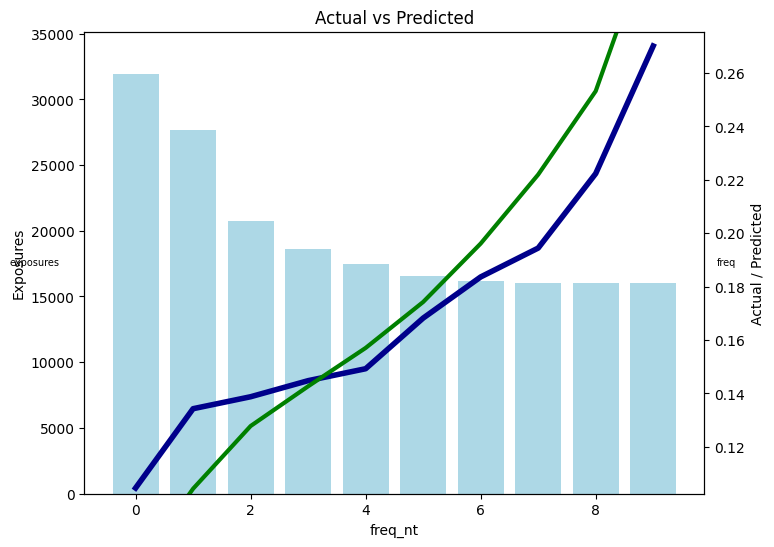

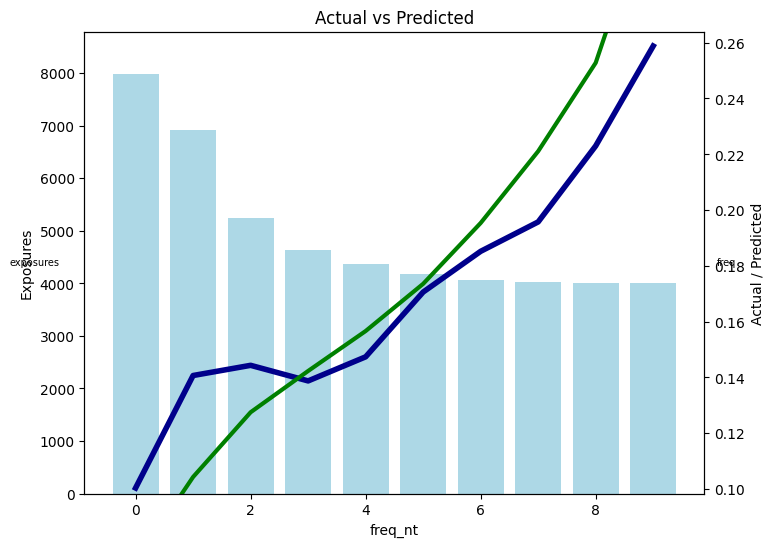

In [ ]:
var = {}  # Define an empty dictionary
var['curr'] = "freq_nt"

avse_plot_classification(var=var['curr'], data=df_tmp_train, actual='y_train',
                         pred='pred_y_GLM_init', weight='ee_pd',
                         lt_text='exposures', rt_text='freq')

avse_plot_classification(var=var['curr'], data=df_tmp_test, actual='y_test',
                         pred='pred_y_GLM_init', weight='ee_pd',
                         lt_text='exposures', rt_text='freq')


In [ ]:
print(x_train.columns.tolist())

['py', 'late_payments', 'credit', 'veh_count', 'driver_count', 'veh_driver_ratio', 'veh_age', 'limit_pd', 'driver_age', 'acc_minor', 'acc_major', 'vio_speed', 'vio_minor', 'vio_major', 'pol_tenure', 'ee_pd', 'geo_pop_density_ntile', 'geo_median_home_value_ntile', 'geo_unemployment_pct_ntile', 'geo_vacant_pct_ntile', 'geo_crime_index_ntile', 'geo_bach_pct_ntile', 'prior_claim_freq_bi', 'prior_claim_freq_pd', 'prior_claim_freq_med', 'prior_claim_freq_pip', 'prior_claim_freq_um', 'prior_claim_freq_uim', 'prior_claim_freq_coll', 'prior_claim_freq_comp', 'prior_claim_freq_tot', 'AAM', 'NOO', 'LOO', 'est_current_odo']


In [ ]:
import numpy as np
import xgboost as xgb

# Assuming you have the full_data DataFrame available

# Split the full_data into train_data and test_data
# Adjust the code according to your specific split requirements
train_data = full_data.sample(frac=0.8, random_state=123)
test_data = full_data.drop(train_data.index)

# Split the train_data into x_train and y_train
x_train = train_data.drop(columns=['claim_count_pd'])
y_train = train_data['claim_count_pd']

# Split the test_data into x_test and y_test
x_test = test_data.drop(columns=['claim_count_pd'])
y_test = test_data['claim_count_pd']

# Create the DMatrix objects
dtrain = xgb.DMatrix(data=np.array(x_train), label=y_train)
dtest = xgb.DMatrix(data=np.array(x_test), label=y_test)


In [ ]:
print(df_test_pred.head())


     y_test  pred_y_GLM_init
0         0         0.110412
25        0         0.140397
43        0         0.083827
84        0         0.091609
115       0         0.090589


First, a simple xgb

In [ ]:
import xgboost as xgb
import numpy as np

# Calculate the class weights
pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
print(pos_weight)

# Define the parameters for the XGBoost model
params = {
    'objective': 'binary:logistic',
    'eta': 0.5,
    'max_depth': 9,
    'eval_metric': 'auc',
    'scale_pos_weight': pos_weight
}

# Train the XGBoost model with balanced class weights
num_rounds = 100
fit = xgb.train(params, dtrain, num_boost_round=num_rounds)

# Generate predictions for training data
train_pred = fit.predict(dtrain)
df_train_pred['pred_y_XGB_balanced'] = train_pred[:len(df_train_pred)]

# Generate predictions for test data
test_pred = fit.predict(dtest)
df_test_pred['pred_y_XGB_balanced'] = test_pred[:len(df_test_pred)]

# Convert predictions to binary values
df_train_pred_bin['df_train_pred_bin'] = np.where(df_train_pred['pred_y_XGB_balanced'] > 0.5, 1, 0)
df_test_pred_bin['df_test_pred_bin'] = np.where(df_test_pred['pred_y_XGB_balanced'] > 0.5, 1, 0)


8.98390095970248


In [ ]:
print(df_train_pred.columns)
print(df_test_pred.columns)

Index(['y_train', 'pred_y_GLM_init', 'pred_y_XGB_balanced'], dtype='object')
Index(['y_test', 'pred_y_GLM_init', 'pred_y_XGB_balanced'], dtype='object')


In [ ]:
print(df_test_pred.head())

     y_test  pred_y_GLM_init  pred_y_XGB_balanced
0         0         0.110412             0.361939
25        0         0.140397             0.393151
43        0         0.083827             0.927008
84        0         0.091609             0.487547
115       0         0.090589             0.587029


In [ ]:
import xgboost as xgb
import numpy as np

# Calculate weights based on ratio of classes
pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
print(pos_weight)

# Define the parameters for the XGBoost model
params = {
    'objective': 'binary:logistic',
    'eta': 0.5,
    'max_depth': 9,
    'eval_metric': 'auc',
    'scale_pos_weight': pos_weight
}

# Train the XGBoost model with balanced class weights
num_rounds = 100
fit = xgb.train(params, dtrain, num_boost_round=num_rounds)

# Generate predictions for training data
train_pred = fit.predict(dtrain)
df_train_pred['pred_y_XGB_balanced'] = np.zeros(len(df_train_pred))
df_train_pred.loc[df_train_pred.index[:len(train_pred)], 'pred_y_XGB_balanced'] = train_pred

# Generate predictions for test data
test_pred = fit.predict(dtest)
df_test_pred['pred_y_XGB_balanced'] = np.zeros(len(df_test_pred))
df_test_pred.loc[df_test_pred.index[:len(test_pred)], 'pred_y_XGB_balanced'] = test_pred

# Convert predictions to binary values
df_train_pred_bin['pred_y_XGB_balanced'] = np.where(df_train_pred['pred_y_XGB_balanced'] > 0.5, 1, 0)
df_test_pred_bin['pred_y_XGB_balanced'] = np.where(df_test_pred['pred_y_XGB_balanced'] > 0.5, 1, 0)


8.98390095970248


ValueError: ignored